In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_gold_prices, load_events
from src.preprocessing import get_event_window_returns
from src.analysis import event_summary_tabel
from src.visualization import plot_event_window


In [4]:

gold = load_gold_prices("../data/gold_prices.csv")
gold["return"] = gold["close"].pct_change()
gold = gold.dropna()

events = load_events("../data/events.csv")
gold.head(), events.head()



(        date     open     high      low    close    return
 1 2021-03-02  1724.96  1739.18  1707.31  1738.48  0.007844
 2 2021-03-03  1738.22  1740.52  1702.28  1711.04 -0.015784
 3 2021-03-04  1710.98  1722.91  1690.94  1697.50 -0.007913
 4 2021-03-05  1697.72  1707.48  1687.56  1698.33  0.000489
 5 2021-03-08  1703.55  1714.20  1676.95  1683.60 -0.008673,
         date        event  type
 0 2020-12-01      262.045   CPI
 1 2021-01-01      262.639   CPI
 2 2021-01-01         0.09  RATE
 3 2021-01-08  NFP Release   NFP
 4 2021-02-01      263.573   CPI)

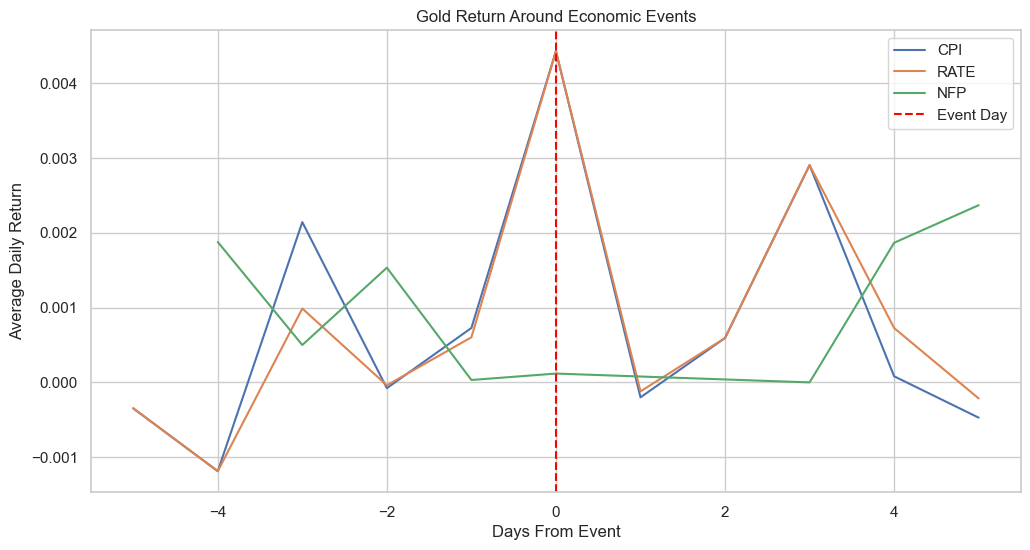

In [5]:
plot_event_window(gold, events, window=5)


In [52]:
returns_df = get_event_window_returns(gold, events, window=5)

In [58]:
summary = []

for event_type in returns_df["type"].unique():
    df_event = returns_df[returns_df["type"] == event_type]

    before = df_event[df_event["day_relative"] < 0]["return"].mean()
    after = df_event[df_event["day_relative"] > 0]["return"].mean()

    summary.append({
        "Event": event_type,
        "Mean Return Before": before,
        "Mean Return After": after,
        "Difference (After - Before)": after - before
    })

summary_df = pd.DataFrame(summary)
summary_df


,Event,Mean Return Before,Mean Return After,Difference (After - Before)
0,CPI,0.000243,0.000590,0.000347
1,RATE,0.000011,0.000777,0.000766
2,NFP,0.000972,0.001412,0.000440
